# Tries

What is a Trie?

A Trie is a tree-based data structure that is used to store a collection of strings. Each node in a trie represents a prefix of a string, and the edges leading down from a node represent possible next characters in the strings. The root node represents an empty string.

Key Concepts of a Trie:

* Nodes: Each node in a trie (except the root) represents a character.
* Edges: Edges connect nodes and represent the sequence of characters forming a prefix or a word.
* Root: The root node represents an empty string.
* Word Termination: Nodes can be marked to indicate the end of a valid word in the stored set.
* Prefix Sharing: Strings with common prefixes share the same path from the root down to the node representing that prefix.

Why Use Tries?

* Efficient Prefix Searching: Tries excel at prefix-based search operations like autocomplete or spell checking. Finding all words with a given prefix is very efficient.
* Space Efficiency for Shared Prefixes: If many words share common prefixes, the trie structure can save space by storing the prefix only once.
* Faster String Searching (in some cases): For a set of strings, searching for a specific string in a trie can be faster than other data structures like hash sets, especially for prefix-based searches. The time complexity is often proportional to the length of the word being searched.

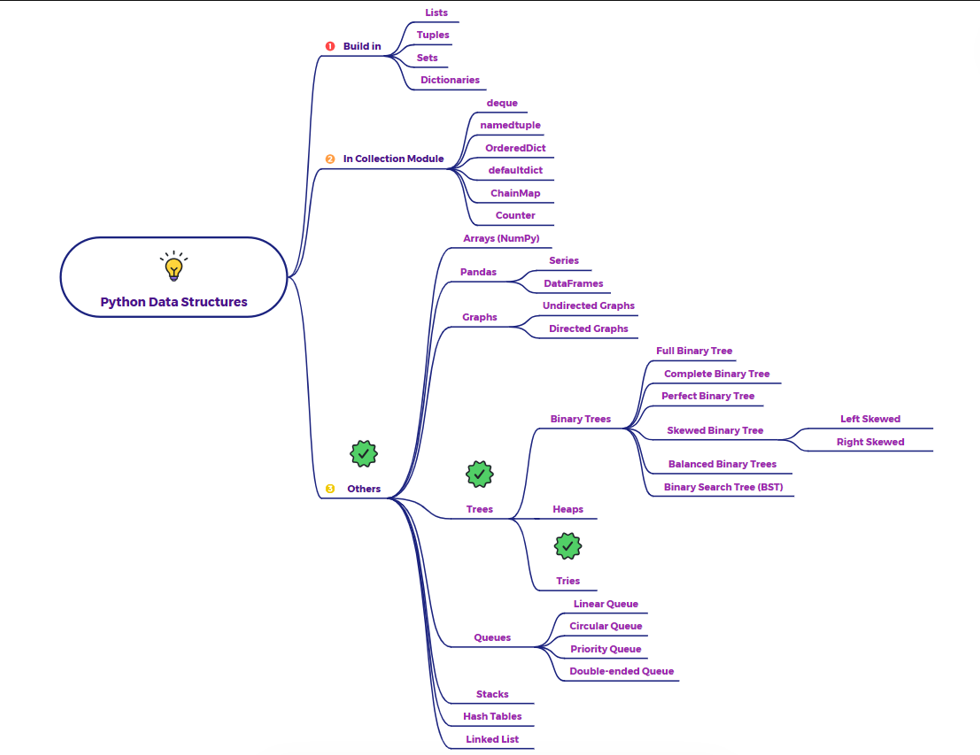


# 1. TrieNode Class:

* This is the basic building block of the Trie.
* self.children: A dictionary where keys are characters (e.g., 'a', 'b', 'c') and values are other TrieNode objects. This allows a node to branch out to multiple possible next characters. We use collections.defaultdict(TrieNode) for convenience; if you try to access node.children['x'] and 'x' isn't there, it automatically creates a new TrieNode for 'x'.
* self.is_end_of_word: A boolean flag. If True, it means the path from the root to this specific node forms a complete, valid word that was inserted into the dictionary.

In [170]:
import collections

print("--- Trie Data Structure: Autocomplete Dictionary Example ---")

# 1. TrieNode Class
class TrieNode:
    """
    Represents a single node in the Trie.
    - `children`: A dictionary mapping a character to its child TrieNode.
    - `is_end_of_word`: A boolean flag indicating if this node completes a valid word.
    """
    def __init__(self):
        # Using a default dict makes adding new children cleaner,
        # as it automatically creates a new TrieNode if a key doesn't exist.
        self.children = collections.defaultdict(TrieNode)
        self.is_end_of_word = False

--- Trie Data Structure: Autocomplete Dictionary Example ---


# 2. Define the Trie class and methods

A. Trie Class:

* self.root: The starting point of our Trie. It's an empty TrieNode that doesn't represent any character itself, but acts as the parent for the first characters of all words.

B. insert(word) Method:

* It iterates through each character of the word.
* For each character, it moves current_node down to the corresponding child. If a child for that character doesn't exist, it's created automatically by defaultdict.
* Once all characters of the word have been processed, the is_end_of_word flag of the final current_node is set to True.

C. search(word) Method:

* It also traverses the Trie character by character.
* If at any point a character in the word doesn't have a corresponding child node, the word cannot exist in the Trie, so it returns False.
* If the entire word path is found, it then checks if the is_end_of_word flag of the last node is True. This distinction is crucial: 'app' is a prefix of 'apple', but only 'app' is a complete word if its is_end_of_word flag is set.

D.  starts_with(prefix) Method:

* Similar to search, it traverses the Trie based on the prefix characters.
* If the entire prefix path exists in the Trie, it returns True, regardless of whether that prefix itself marks the end of a complete word or not. This is useful for knowing if there are any words that begin with that sequence of characters.

E. get_words_with_prefix(prefix) Method (Autocomplete):

* First, it finds the node corresponding to the end of the prefix using logic similar to starts_with.
* If the prefix path exists, it then performs a recursive depth-first search (_find_all_words_from_node) starting from that prefix-end node. Every time it encounters a node with is_end_of_word set to True, it adds the current_prefix (which now includes the characters from the DFS) to its results list.

In [171]:
# 2. Trie Class
class Trie:
    """
    Implements the Trie (Prefix Tree) data structure.
    Allows inserting words, searching for words, and checking for prefixes.
    """
    def __init__(self):
        self.root = TrieNode() # The root node represents an empty string/start of all words

    def insert(self, word: str) -> None:
        """
        Inserts a word into the Trie.
        Traverses character by character, creating new nodes if necessary,
        and marks the last node as the end of a word.
        """
        current_node = self.root
        for char in word:
            # If the character is not already a child, defaultdict creates a new TrieNode
            current_node = current_node.children[char]
        current_node.is_end_of_word = True # Mark the end of the word

    def search(self, word: str) -> bool:
        """
        Checks if a word exists in the Trie.
        Traverses the Trie along the word's characters.
        Returns True only if the entire word is found AND its last character node
        is marked as `is_end_of_word`.
        """
        current_node = self.root
        for char in word:
            if char not in current_node.children:
                return False # Character not found in the path
            current_node = current_node.children[char]
        return current_node.is_end_of_word # True if it's a complete word

    def starts_with(self, prefix: str) -> bool:
        """
        Checks if there is any word in the Trie that starts with the given prefix.
        Traverses the Trie along the prefix's characters.
        Returns True if the entire prefix path exists in the Trie.
        """
        current_node = self.root
        for char in prefix:
            if char not in current_node.children:
                return False # Prefix path does not exist
            current_node = current_node.children[char]
        return True # The path for the prefix exists

    def _find_all_words_from_node(self, node: TrieNode, current_prefix: str, results: list):
        """Helper function for finding all words with a given prefix."""
        if node.is_end_of_word:
            results.append(current_prefix)

        for char, child_node in node.children.items():
            self._find_all_words_from_node(child_node, current_prefix + char, results)

    def get_words_with_prefix(self, prefix: str) -> list[str]:
        """
        Returns all words in the Trie that start with the given prefix.
        Useful for autocomplete suggestions.
        """
        current_node = self.root
        for char in prefix:
            if char not in current_node.children:
                return [] # No words start with this prefix
            current_node = current_node.children[char]

        results = []
        self._find_all_words_from_node(current_node, prefix, results)
        return results

# 3. Execute the methods

In [172]:
# --- Demonstrating the Trie in the Autocomplete Scenario ---

my_dictionary = Trie()

print("--- Building the Dictionary (Inserting Words) ---")
words_to_add = ["apple", "app", "apricot", "apply", "banana", "band", "bandana", "cat", "car"]
for word in words_to_add:
    my_dictionary.insert(word)
    print(f"Inserted: '{word}'")

# --- Checking Word Existence ---

print("\n--- Searching for Words ---")
print(f"Does 'apple' exist? {my_dictionary.search('apple')}")      # Expected: True
print(f"Does 'app' exist? {my_dictionary.search('app')}")          # Expected: True
print(f"Does 'ap' exist? {my_dictionary.search('ap')}")            # Expected: False (it's a prefix, not a full word)
print(f"Does 'appl' exist? {my_dictionary.search('appl')}")        # Expected: False
print(f"Does 'banana' exist? {my_dictionary.search('banana')}")    # Expected: True
print(f"Does 'band' exist? {my_dictionary.search('band')}")        # Expected: True
print(f"Does 'orange' exist? {my_dictionary.search('orange')}")    # Expected: False

# --- Checking Prefixes ---

print("\n--- Checking for Prefixes ---")
print(f"Does any word start with 'ap'? {my_dictionary.starts_with('ap')}")     # Expected: True
print(f"Does any word start with 'appl'? {my_dictionary.starts_with('appl')}") # Expected: True
print(f"Does any word start with 'ban'? {my_dictionary.starts_with('ban')}")   # Expected: True
print(f"Does any word start with 'catf'? {my_dictionary.starts_with('catf')}") # Expected: False (no word starts with 'catf')
print(f"Does any word start with 'x'? {my_dictionary.starts_with('x')}")       # Expected: False

# --- Autocomplete Suggestion Feature ---

print("\n--- Autocomplete Suggestions ---")
prefix1 = "ap"
print(f"Words starting with '{prefix1}': {my_dictionary.get_words_with_prefix(prefix1)}") # Expected: ['apple', 'app', 'apricot', 'apply']

prefix2 = "ban"
print(f"Words starting with '{prefix2}': {my_dictionary.get_words_with_prefix(prefix2)}") # Expected: ['banana', 'band', 'bandana']

prefix3 = "ca"
print(f"Words starting with '{prefix3}': {my_dictionary.get_words_with_prefix(prefix3)}") # Expected: ['cat', 'car']

prefix4 = "xyz"
print(f"Words starting with '{prefix4}': {my_dictionary.get_words_with_prefix(prefix4)}") # Expected: []

--- Building the Dictionary (Inserting Words) ---
Inserted: 'apple'
Inserted: 'app'
Inserted: 'apricot'
Inserted: 'apply'
Inserted: 'banana'
Inserted: 'band'
Inserted: 'bandana'
Inserted: 'cat'
Inserted: 'car'

--- Searching for Words ---
Does 'apple' exist? True
Does 'app' exist? True
Does 'ap' exist? False
Does 'appl' exist? False
Does 'banana' exist? True
Does 'band' exist? True
Does 'orange' exist? False

--- Checking for Prefixes ---
Does any word start with 'ap'? True
Does any word start with 'appl'? True
Does any word start with 'ban'? True
Does any word start with 'catf'? False
Does any word start with 'x'? False

--- Autocomplete Suggestions ---
Words starting with 'ap': ['app', 'apple', 'apply', 'apricot']
Words starting with 'ban': ['banana', 'band', 'bandana']
Words starting with 'ca': ['cat', 'car']
Words starting with 'xyz': []


# COMPLETED